In [ ]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("AccidentsBig.csv")

# Display the first few rows of the dataframe
df.head()


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1,78.610393,14.724026,1,2,1,1,3,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2,78.534042,14.762353,1,3,1,1,4,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3,78.470877,14.745606,1,3,2,1,5,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4,78.557994,14.667128,1,3,1,1,6,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5,78.576431,14.703443,1,3,1,1,2,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [ ]:

# Update the column names based on your dataset
date_column = 'Date'  # Replace with the correct column name
road_condition_column = 'Road_Condition'  # Replace with the correct column name
weather_column = 'Weather'  # Replace with the correct column name
latitude_column = 'Latitude'  # Replace with the correct column name
longitude_column = 'Longitude'  # Replace with the correct column name

In [ ]:
# Convert 'Date' and 'Time' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Display basic information about the dataframe
df.info()

# Handle missing values if necessary
df = df.dropna(subset=['Date', 'Time', 'Road_Surface_Conditions', 'Weather_Conditions', 'latitude', 'longitude'])

# Display the first few rows of the preprocessed dataframe
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               59998 non-null  int64         
 1   longitude                                    59998 non-null  float64       
 2   latitude                                     59998 non-null  float64       
 3   Police_Force                                 59998 non-null  int64         
 4   Accident_Severity                            59998 non-null  int64         
 5   Number_of_Vehicles                           59998 non-null  int64         
 6   Number_of_Casualties                         59998 non-null  int64         
 7   Day_of_Week                                  59998 non-null  int64         
 8   Time                                         59997 non-null  object        


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1,78.610393,14.724026,1,2,1,1,3,17:42:00,12,...,1,1,2,2,0,0,1,1,E01002849,2018-01-04
1,2,78.534042,14.762353,1,3,1,1,4,17:36:00,12,...,5,4,1,1,0,0,1,1,E01002909,2018-01-05
2,3,78.470877,14.745606,1,3,2,1,5,00:15:00,12,...,0,4,1,1,0,0,1,1,E01002857,2018-01-06
3,4,78.557994,14.667128,1,3,1,1,6,10:35:00,12,...,0,1,1,1,0,0,1,1,E01002840,2018-01-07
4,5,78.576431,14.703443,1,3,1,1,2,21:13:00,12,...,0,7,1,2,0,0,1,1,E01002863,2018-01-10


In [ ]:
# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')



In [ ]:

# Extract hour from the 'Time' column
df['hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

<ipython-input-22-c346dba8e2ae>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


In [ ]:
# Drop rows with missing hour values
df = df.dropna(subset=['Date', 'hour', 'Road_Surface_Conditions', 'Weather_Conditions', 'latitude', 'longitude'])

In [ ]:
# Display the first few rows of the preprocessed dataframe
print(df.head())

   Accident_Index  longitude   latitude  Police_Force  Accident_Severity  \
0               1  78.610393  14.724026             1                  2   
1               2  78.534042  14.762353             1                  3   
2               3  78.470877  14.745606             1                  3   
3               4  78.557994  14.667128             1                  3   
4               5  78.576431  14.703443             1                  3   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week      Time  \
0                   1                     1            3  17:42:00   
1                   1                     1            4  17:36:00   
2                   2                     1            5  00:15:00   
3                   1                     1            6  10:35:00   
4                   1                     1            2  21:13:00   

   Local_Authority_(District)  ... Light_Conditions  Weather_Conditions  \
0                          12  ...             

In [ ]:
# Analyze patterns related to road conditions
road_condition_counts = df['Road_Surface_Conditions'].value_counts()
print(road_condition_counts)

Road_Surface_Conditions
 1    43561
 2    15489
 4      617
 3      231
 5       50
-1       49
Name: count, dtype: int64


In [ ]:
# Analyze patterns related to weather
weather_counts = df['Weather_Conditions'].value_counts()
print(weather_counts)

Weather_Conditions
1    49807
2     7075
8      756
4      582
9      572
5      522
3      406
7      228
6       49
Name: count, dtype: int64


In [ ]:
# Analyze patterns related to time of day
time_of_day_counts = df['hour'].value_counts().sort_index()
print(time_of_day_counts)

hour
0      998
1      736
2      640
3      384
4      285
5      380
6      847
7     2131
8     3938
9     2935
10    2686
11    3029
12    3663
13    3704
14    3517
15    4726
16    4727
17    5165
18    4191
19    3337
20    2627
21    2071
22    1714
23    1566
Name: count, dtype: int64


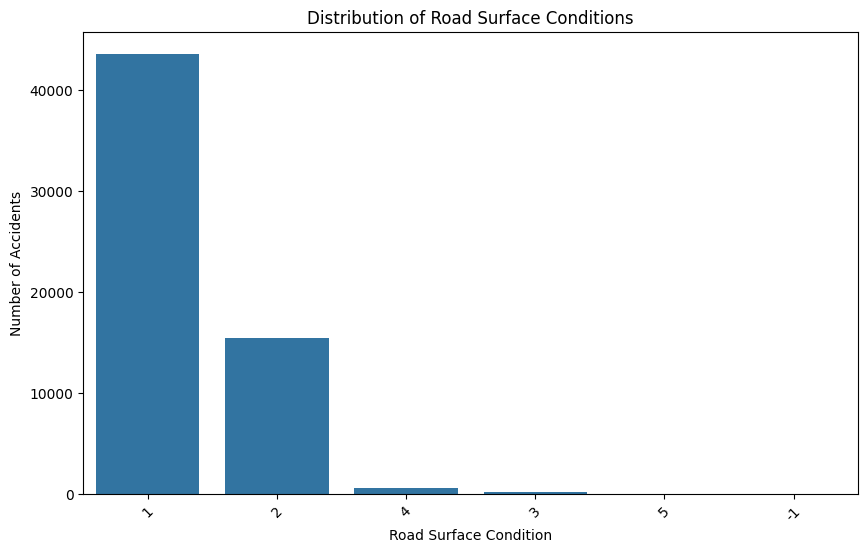

In [ ]:

# Visualize the patterns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_Surface_Conditions', order=road_condition_counts.index)
plt.title('Distribution of Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

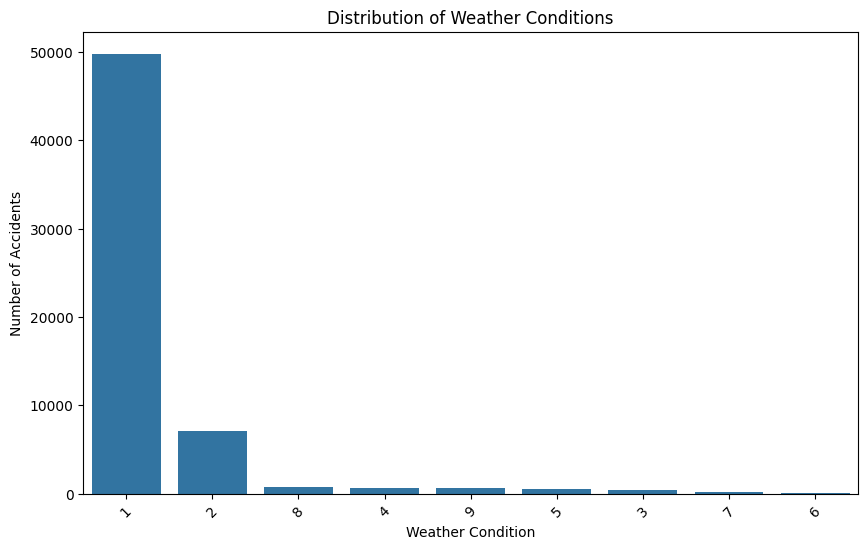

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather_Conditions', order=weather_counts.index)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

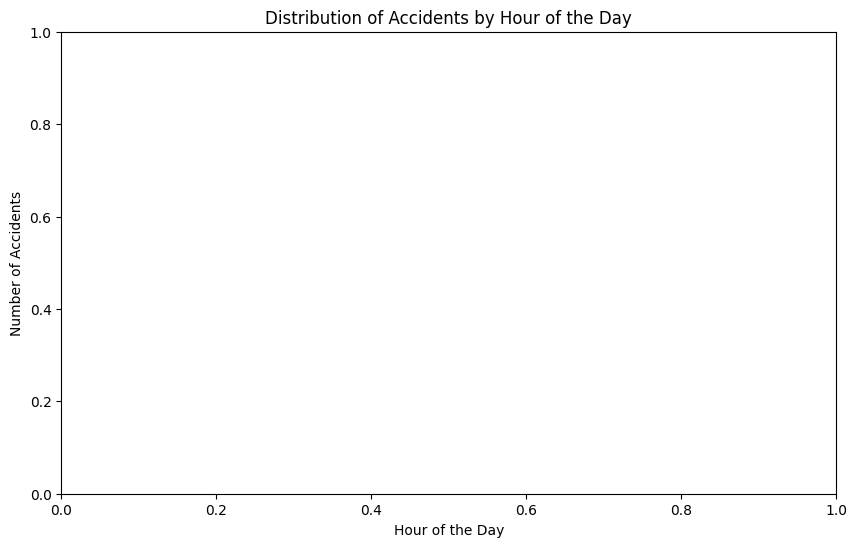

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


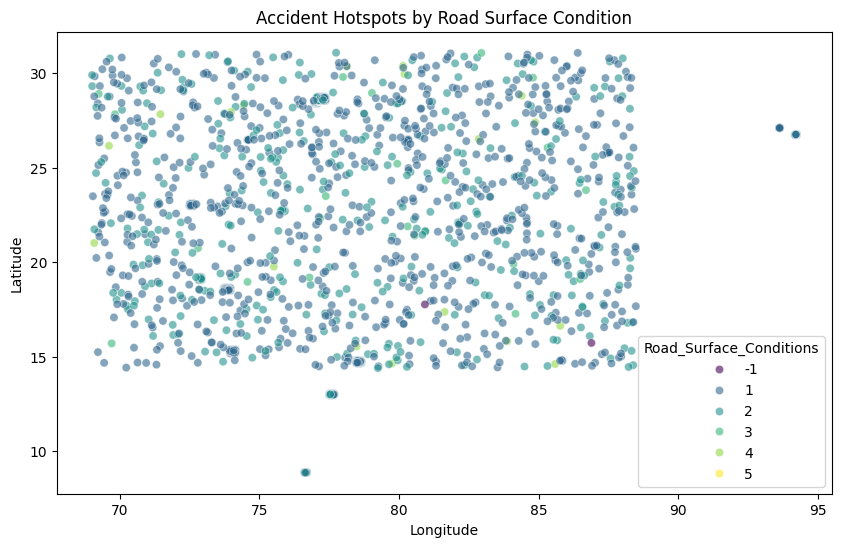

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Road_Surface_Conditions', alpha=0.6, palette='viridis')
plt.title('Accident Hotspots by Road Surface Condition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()